In [2]:
import pandas as pd

df = pd.read_csv('data/fish.csv')

In [4]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [21]:
fish_target = df.loc[cond, ['Species']]
# fish_target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [24]:
# test_target

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [27]:
kn.score(test_input, test_target['Species'])

1.0

In [29]:
kn.predict([[25, 150]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

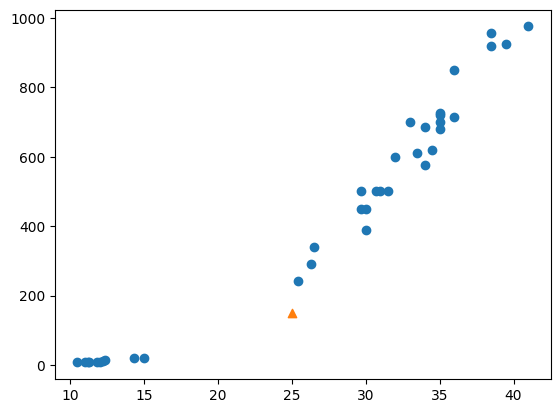

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [35]:
kn.kneighbors([[25, 150]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.39320793]]),
 array([[11, 20,  5,  6,  1]]))

In [37]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.305556
Weight     451.016667
dtype: float64
Length2     10.131449
Weight     324.863110
dtype: float64


In [40]:
train_scaled = (train_input - mean) / std

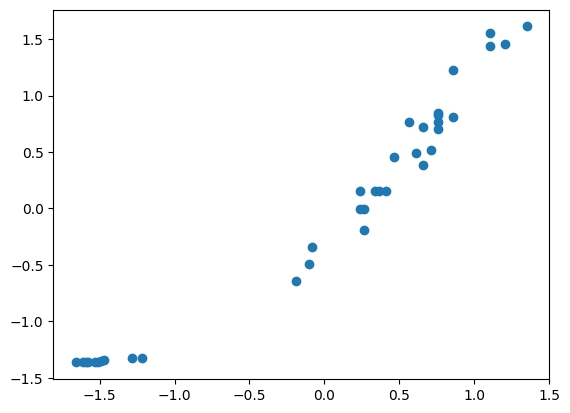

In [41]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [42]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean) / std

In [44]:
kn.score(test_scaled, test_target)

1.0

In [46]:
new = ([25, 150] - mean) / std

In [49]:
kn.predict([new])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## Penguins
-Adelie, Gentoo 구분하기

In [48]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
